# TUGAS 2
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [2]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

### *Load Image*

In [3]:
# Image directories
train_dir = "data/images/images/training/"
test_dir = "data/images/images/test/"

### *Membuat Daftar Path*

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []

    for dir in p.iterdir():
        if dir.is_dir():
            label = dir.name
            for file in dir.glob('*.jpg'):
                try:
                    img = mpimg.imread(file)
                    if img is not None:
                        img_list.append((img, label))
                except Exception as e:
                    print(f"Error loading image {file}: {e}")
    
    return img_list

### *Load Data Training*

In [12]:
train_img = load_dataset(train_dir)

### *Load Data Test*

In [13]:
test_img = load_dataset(test_dir)

### *Cek List*

In [14]:
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

### *Cek Random Ukuran Data*

In [15]:
pick_random = np.random.randint(0, len(train_img))

print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 159
(737, 1024, 3)


### *Tampilkan Gambar*

In [16]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

In [4]:
# Function to compute histogram
def compute_histogram(image_path):
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()  # Normalize histogram
    return hist

### *Tampilkan Acak*


Shape	: (439, 640, 3)
Label	: day


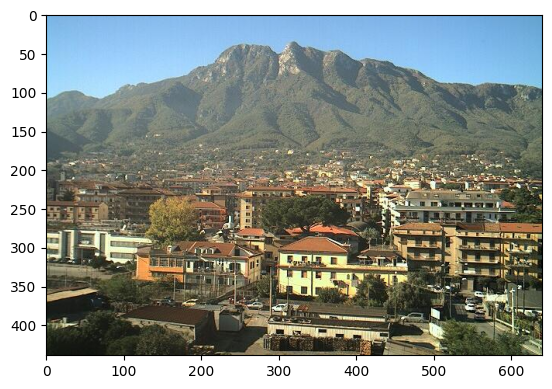

In [17]:
random_img_viz(train_img)

### *Standarkan Ukuran Data*

In [18]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

### *Encode*

In [19]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

### *Standar Ukuran & Encode*

In [20]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

### *Pra Pengolahan Pada Data Training*

In [21]:
train_std_img_list = preprocess(train_img)

### *Pra Pengolahan Pada Data Test*

In [22]:
test_std_img_list = preprocess(test_img)

### *Cek Random Ukuran Data*

In [23]:
pick_random = np.random.randint(0, len(train_std_img_list))

print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 226
(600, 1100, 3)


### *Tampilkan Acak*

Shape	: (600, 1100, 3)
Label	: 1


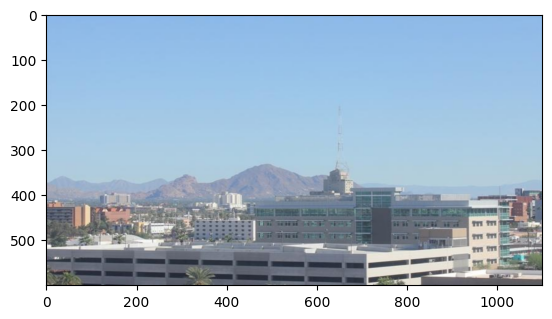

In [24]:
random_img_viz(train_std_img_list)

### *Etraksi Fitur Histogram*

In [25]:
def brightness_histogram(image):
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Hitung histogram grayscale
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Nilai rata-rata kecerahan
    avg_brightness = np.mean(gray)

    return hist, avg_brightness

### *Ekstrasi Fitur AVG Kecerahan*

In [26]:
def extract_features(img_list):
    features = []
    labels = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi histogram dan rata-rata kecerahan
        _, avg_brightness = brightness_histogram(image)

        # Simpan nilai rata-rata kecerahan sebagai fitur
        features.append([avg_brightness])
        labels.append(label)

    return np.array(features), np.array(labels)

### *Ekstrasi Fitur Data Training*

In [27]:
train_features, train_labels = extract_features(train_std_img_list)

### *Ekstrasi Fitur Data Test*

In [28]:
test_features, test_labels = extract_features(test_std_img_list)

### *Split Data*

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

### *Cek Data*

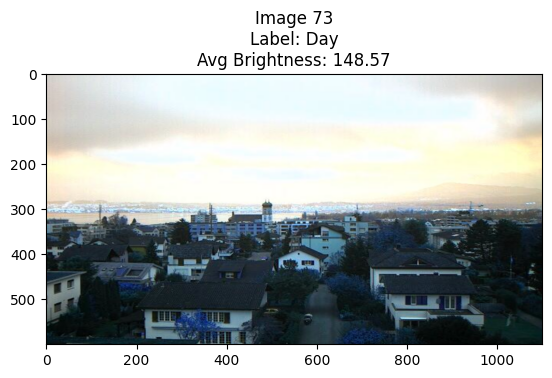

In [32]:
def check_random_brightness(img_list):
    rand_num = np.random.randint(0, len(img_list))
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]

    # Konversi gambar ke RGB jika diperlukan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    hist, avg_brightness = brightness_histogram(img_rgb)

    # Tampilkan gambar
    plt.imshow(img_rgb)
    plt.title(f'Image {rand_num + 1}\nLabel: {"Day" if label == 1 else "Night"}\nAvg Brightness: {avg_brightness:.2f}')
    plt.show()

# Pengecekan pada gambar acak
check_random_brightness(train_std_img_list)

### *Klasifikasi dengan SVM*

In [35]:
from sklearn import svm

# Membuat model SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Prediksi pada data training
train_preds = clf.predict(X_train)

# Prediksi pada data test
test_preds = clf.predict(test_features)

### *Visualisasi Prediksi*

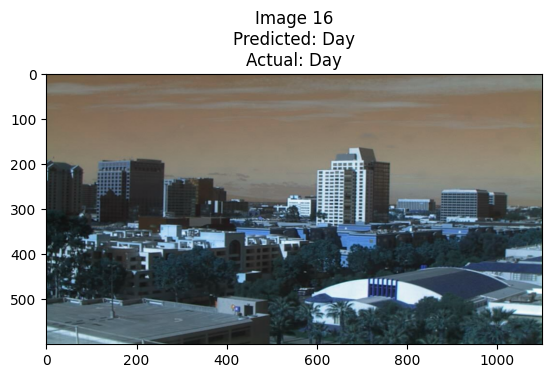

In [37]:
# Fungsi visualisasi prediksi beserta gambar
def visualize_prediction(img_list, X_train, y_train, train_preds):
    rand_idx = np.random.randint(0, len(X_train))  # Pilih gambar acak

    # Ambil gambar asli dari list dan prediksi
    img = img_list[rand_idx][0]
    actual_label = y_train[rand_idx]
    predicted_label = train_preds[rand_idx]

    # Konversi gambar ke RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar dengan label asli dan prediksi
    plt.imshow(img_rgb)
    plt.title(f'Image {rand_idx + 1}\nPredicted: {"Day" if predicted_label == 1 else "Night"}\nActual: {"Day" if actual_label == 1 else "Night"}')
    plt.show()

# Panggil fungsi untuk visualisasi prediksi
visualize_prediction(train_std_img_list, X_train, y_train, train_preds)

### *Evaluasi*

In [39]:
from sklearn.metrics import accuracy_score

# Hitung akurasi pada data training
train_acc = accuracy_score(y_train, train_preds)

# Prediksi menggunakan data test
test_preds = clf.predict(test_features)

# Hitung akurasi pada data test
test_acc = accuracy_score(test_labels, test_preds)

# Tampilkan hasil akurasi
print(f'Accuracy on Training Data: {train_acc * 100:.2f}%')
print(f'Accuracy on Test Data: {test_acc * 100:.2f}%')

Accuracy on Training Data: 97.92%
Accuracy on Test Data: 94.38%
